In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv

In [25]:
anime_review_train = pd.read_csv('./assets/dataanime.csv')

#### Above read dataanime for to train reviews

In [26]:
print(f"Data Shape: {anime_review_train}")

Data Shape:                                                   Title   Type Episodes  \
0                      Fullmetal Alchemist: Brotherhood     TV       64   
1                                        Kimi no Na wa.  Movie        1   
2                                              Gintama°     TV       51   
3                                         Steins;Gate 0     TV       23   
4                                           Steins;Gate     TV       24   
...                                                 ...    ...      ...   
1558                                    Kuroshitsuji II     TV       12   
1559                              Minami-ke Natsuyasumi    OVA        1   
1560  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...  Movie        1   
1561        Persona 4 the Animation: The Factor of Hope  Movie        1   
1562                                       Re:␣Hamatora     TV       12   

                Status Start airing End airing Starting season  \
0      Finished Airin

In [27]:
print(anime_review_train.columns)

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')


In [28]:
ranked_anime_review = anime_review_train[['Description', 'Score']].sort_values(by='Score')

In [29]:
ranked_anime_review

,Description,Score
1562,It has been three months since the incident at...,7.48
1521,"Jiang Hao Yi, a normal, high school student wh...",7.48
1548,"In his past life, although too weak to protect...",7.48
1550,Beelzebub specials included in the BD/DVD rele...,7.48
1551,A new island resort has been built in Tokyo ba...,7.48
...,...,...
4,The self-proclaimed mad scientist Rintarou Oka...,9.14
3,The dark untold story of Steins;Gate that lead...,9.16
2,"Gintoki, Shinpachi, and Kagura return as the f...",9.16
1,"Mitsuha Miyamizu, a high school girl, yearns t...",9.19


In [30]:
ranked_anime_review['Score'].median()

7.82

In [31]:
ranked_anime_review['Score'].mode()

0    7.55
dtype: float64

In [32]:
ranked_anime_review['Score'].mean()

7.905143953934741

#### Mean and Median Score is very close to lowest score so we use regression 

In [33]:
regression_anime_review = ranked_anime_review['Score'].value_counts()

In [34]:
ra_review = ranked_anime_review.groupby(['Score'],as_index=False).count()
ra_review

,Score,Description
0,7.48,15
1,7.49,27
2,7.50,29
3,7.51,24
4,7.52,24
...,...,...
141,9.11,3
142,9.14,1
143,9.16,2
144,9.19,1


#### math calculation of positive, negative and natural range

In [35]:
range = 925 - 748
range

177

In [36]:
round(range/3)

59

#### Math calculation says use 0.59 for each situation.
#### We check it as below analysis

In [37]:
ra_review = ra_review.rename(columns={'Score': 'points', 'Description': 'count'})


In [38]:
ra_review

,points,count
0,7.48,15
1,7.49,27
2,7.50,29
3,7.51,24
4,7.52,24
...,...,...
141,9.11,3
142,9.14,1
143,9.16,2
144,9.19,1


In [39]:
X = ra_review['points'].values
y = ra_review['count'].values
X

array([7.48, 7.49, 7.5 , 7.51, 7.52, 7.53, 7.54, 7.55, 7.56, 7.57, 7.58,
       7.59, 7.6 , 7.61, 7.62, 7.63, 7.64, 7.65, 7.66, 7.67, 7.68, 7.69,
       7.7 , 7.71, 7.72, 7.73, 7.74, 7.75, 7.76, 7.77, 7.78, 7.79, 7.8 ,
       7.81, 7.82, 7.83, 7.84, 7.85, 7.86, 7.87, 7.88, 7.89, 7.9 , 7.91,
       7.92, 7.93, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99, 8.  , 8.01, 8.02,
       8.03, 8.04, 8.05, 8.06, 8.07, 8.08, 8.09, 8.1 , 8.11, 8.12, 8.13,
       8.14, 8.15, 8.16, 8.17, 8.18, 8.19, 8.2 , 8.21, 8.22, 8.23, 8.24,
       8.26, 8.27, 8.28, 8.29, 8.3 , 8.31, 8.32, 8.33, 8.34, 8.35, 8.36,
       8.37, 8.38, 8.39, 8.4 , 8.41, 8.42, 8.43, 8.44, 8.45, 8.46, 8.47,
       8.48, 8.49, 8.5 , 8.51, 8.52, 8.53, 8.54, 8.55, 8.56, 8.57, 8.58,
       8.59, 8.6 , 8.62, 8.63, 8.64, 8.65, 8.66, 8.67, 8.7 , 8.71, 8.72,
       8.73, 8.74, 8.75, 8.77, 8.79, 8.8 , 8.81, 8.83, 8.86, 8.87, 8.88,
       8.92, 8.95, 8.99, 9.01, 9.02, 9.03, 9.04, 9.07, 9.1 , 9.11, 9.14,
       9.16, 9.19, 9.25])

In [40]:
X=X.reshape(-1,1)
X

array([[7.48],
       [7.49],
       [7.5 ],
       [7.51],
       [7.52],
       [7.53],
       [7.54],
       [7.55],
       [7.56],
       [7.57],
       [7.58],
       [7.59],
       [7.6 ],
       [7.61],
       [7.62],
       [7.63],
       [7.64],
       [7.65],
       [7.66],
       [7.67],
       [7.68],
       [7.69],
       [7.7 ],
       [7.71],
       [7.72],
       [7.73],
       [7.74],
       [7.75],
       [7.76],
       [7.77],
       [7.78],
       [7.79],
       [7.8 ],
       [7.81],
       [7.82],
       [7.83],
       [7.84],
       [7.85],
       [7.86],
       [7.87],
       [7.88],
       [7.89],
       [7.9 ],
       [7.91],
       [7.92],
       [7.93],
       [7.94],
       [7.95],
       [7.96],
       [7.97],
       [7.98],
       [7.99],
       [8.  ],
       [8.01],
       [8.02],
       [8.03],
       [8.04],
       [8.05],
       [8.06],
       [8.07],
       [8.08],
       [8.09],
       [8.1 ],
       [8.11],
       [8.12],
       [8.13],
       [8.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=10)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (116, 1)
y_train shape (116,)
X_test shape (30, 1)
y_test shape (30,)
[ 1  5  9 10  6  4 25 21  2 10  9  1 15 19 27  6 15 15  1  3 17  1 11 29
 10  8  4  1 20  1]


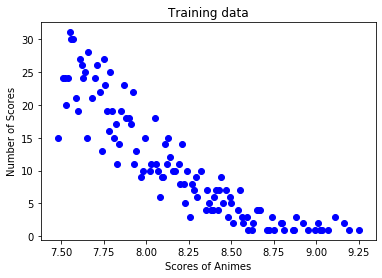

In [43]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Animes' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [44]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 79.39 %
Test accuracy 82.43 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

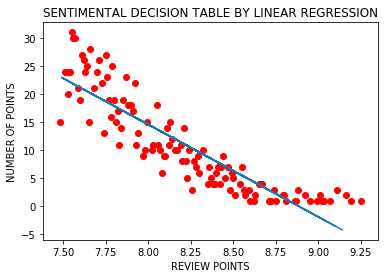

In [45]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

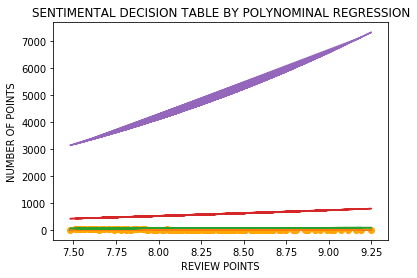

In [46]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [50]:
def create_sentiment(int):
    if int >=7.48 and int<8.00:
        return 0
    if int>=8.00 and int<8.75:
        return 1
    if int>=8.76 and int<9.26:
        return 2

### Above the decision of breakpoints are given 

In [51]:
ranked_anime_review['sentiment'] = ranked_anime_review['Score'].apply(create_sentiment)

In [52]:
ranked_anime_review

,Description,Score,sentiment
1562,It has been three months since the incident at...,7.48,0.0
1521,"Jiang Hao Yi, a normal, high school student wh...",7.48,0.0
1548,"In his past life, although too weak to protect...",7.48,0.0
1550,Beelzebub specials included in the BD/DVD rele...,7.48,0.0
1551,A new island resort has been built in Tokyo ba...,7.48,0.0
...,...,...,...
4,The self-proclaimed mad scientist Rintarou Oka...,9.14,2.0
3,The dark untold story of Steins;Gate that lead...,9.16,2.0
2,"Gintoki, Shinpachi, and Kagura return as the f...",9.16,2.0
1,"Mitsuha Miyamizu, a high school girl, yearns t...",9.19,2.0


In [ ]:
def clean_comas(str):
    return str.replace(',', ';')